In [1]:
import data_utils
import pandas as pd
import warnings
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
%matplotlib inline
warnings.filterwarnings('ignore')

df = data_utils.get_dataset()

dataset = df.copy()
dataset = dataset.astype(str)
dataset = dataset.drop_duplicates()

display(dataset.head())
print(f'dataset.shape: {dataset.shape}')
set(dataset['RIESGO_VIDA'].values)

,AFEC_DPTO,AFEC_EDADR,AFEC_EDUC,AFEC_GENERO,AFEC_GETNICO,AFEC_MPIO,AFEC_PARENTESCO,AFEC_POBESPECIAL,AFEC_REGAFILIACION,AFEC_TIPOPER,...,PET_MPIO,PET_TIPOPER,PQR_CANAL,PQR_CLASE_SNS,PQR_ESTADO,PQR_GRUPOALERTA,PQR_TIPOATENCION,PQR_TIPOPETICION,RIESGO_VIDA,TRIM
0,bogota d.c.,de 13 a 17 años,ninguno,mujer,no aplica,bogotá,otro,no aplica,subsidiado,natural,...,bogotá,juridica,escrito,pqr,cerrado,0,peticion directa,reclamo,no,trim i
1,nariño,de 0 a 5 años,ninguno,hombre,no aplica,puerres,otro,no aplica,subsidiado,natural,...,puerres,natural,telefonico,pqr,cerrado,0,0,reclamo,no,trim i
2,valle,de 13 a 17 años,secundaria,hombre,no aplica,cali,abuelo (a),no aplica,contributivo,natural,...,cali,natural,telefonico,pqr,cerrado,0,0,reclamo,no,trim i
3,huila,de 13 a 17 años,universitario incompleto,hombre,no aplica,neiva,padre,no aplica,contributivo,natural,...,neiva,natural,personalizado,pqr,cerrado,0,0,reclamo,no,trim i
4,risaralda,de 13 a 17 años,ninguno,hombre,no aplica,dosquebradas,padre,persona en condición de discapacidad,contributivo,natural,...,dosquebradas,natural,personalizado,pqr,pendiente (avance),0,0,reclamo,si,trim i


dataset.shape: (1985682, 46)


{'0', 'no', 'si'}

In [2]:
dataset = dataset.applymap(lambda col: None if col == '0' else col)
print(f'dataset.shape: {dataset.shape}')


dataset.shape: (1985682, 46)


In [28]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
plt.rcParams.update({'font.size': 12})

clist = ['#de411b', '#0ac3e6', '#c31900', '#9BB4BE', '#379BD7', '#eb6961', '#233237', '#285078','#690505']
n_colors = len(clist)
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)


def plot_missing_values(dataset):
    zero_df = dataset.isnull().mean().to_frame(name = 'missing')
    non_zero_df = dataset.notnull().mean().to_frame(name = 'not_missing')
    missing_values = pd.concat([zero_df, non_zero_df], axis=1, sort=False)
    missing_values['total'] = missing_values['missing'] + missing_values['not_missing'] 

    
    plt.figure(figsize=(15,5))

    features = list(missing_values.index)
    width = .7
    ind = np.arange(len(features)) 

    plot_missing = plt.bar(ind, missing_values['missing'], width, color = '#de411b', alpha = 0.9)
    plot_not_missing = plt.bar(ind, missing_values['not_missing'], width, color = '#0ac3e6', alpha = 0.9, bottom=missing_values['missing'])

    plt.ylabel('%')
    plt.title('% Missing values')
    plt.xticks(ind, tuple(features))
    plt.yticks(np.arange(0, .8, 1))
    plt.legend((plot_missing[0], plot_not_missing[0]), ('Missing', 'Not missing'), bbox_to_anchor=(1.05, 1), borderaxespad=0., loc=2)
    plt.xticks(rotation=45, ha='right')
    
    plt.show()

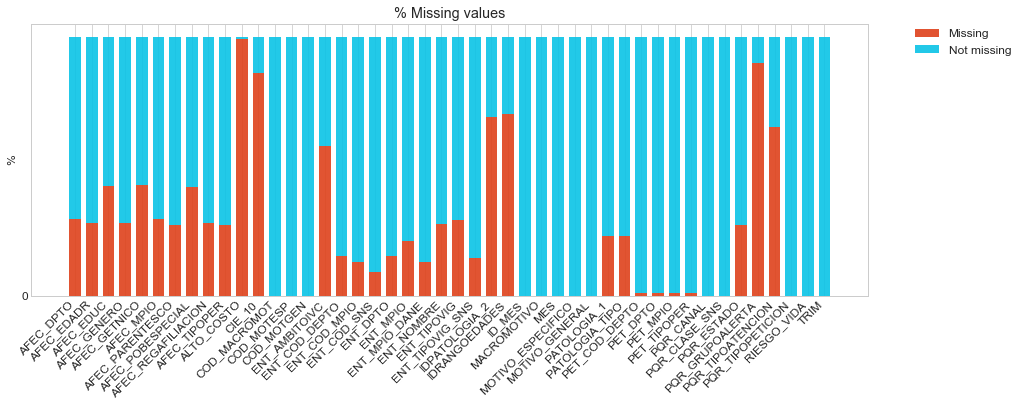

dataset.shape: (1985682, 46)


In [29]:
plot_missing_values(dataset)
print(f'dataset.shape: {dataset.shape}')


In [5]:
from sklearn import preprocessing
dataset_lbl_encoded = dataset.astype(str)
le = preprocessing.LabelEncoder()
for column in dataset_lbl_encoded.columns:
    le.fit(dataset_lbl_encoded[column])
    dataset_lbl_encoded[column] = le.transform(dataset_lbl_encoded[column]) 

dataset_lbl_encoded.head()
print(dataset_lbl_encoded.shape)

dataset.shape: (1985682, 46)
(1985682, 46)


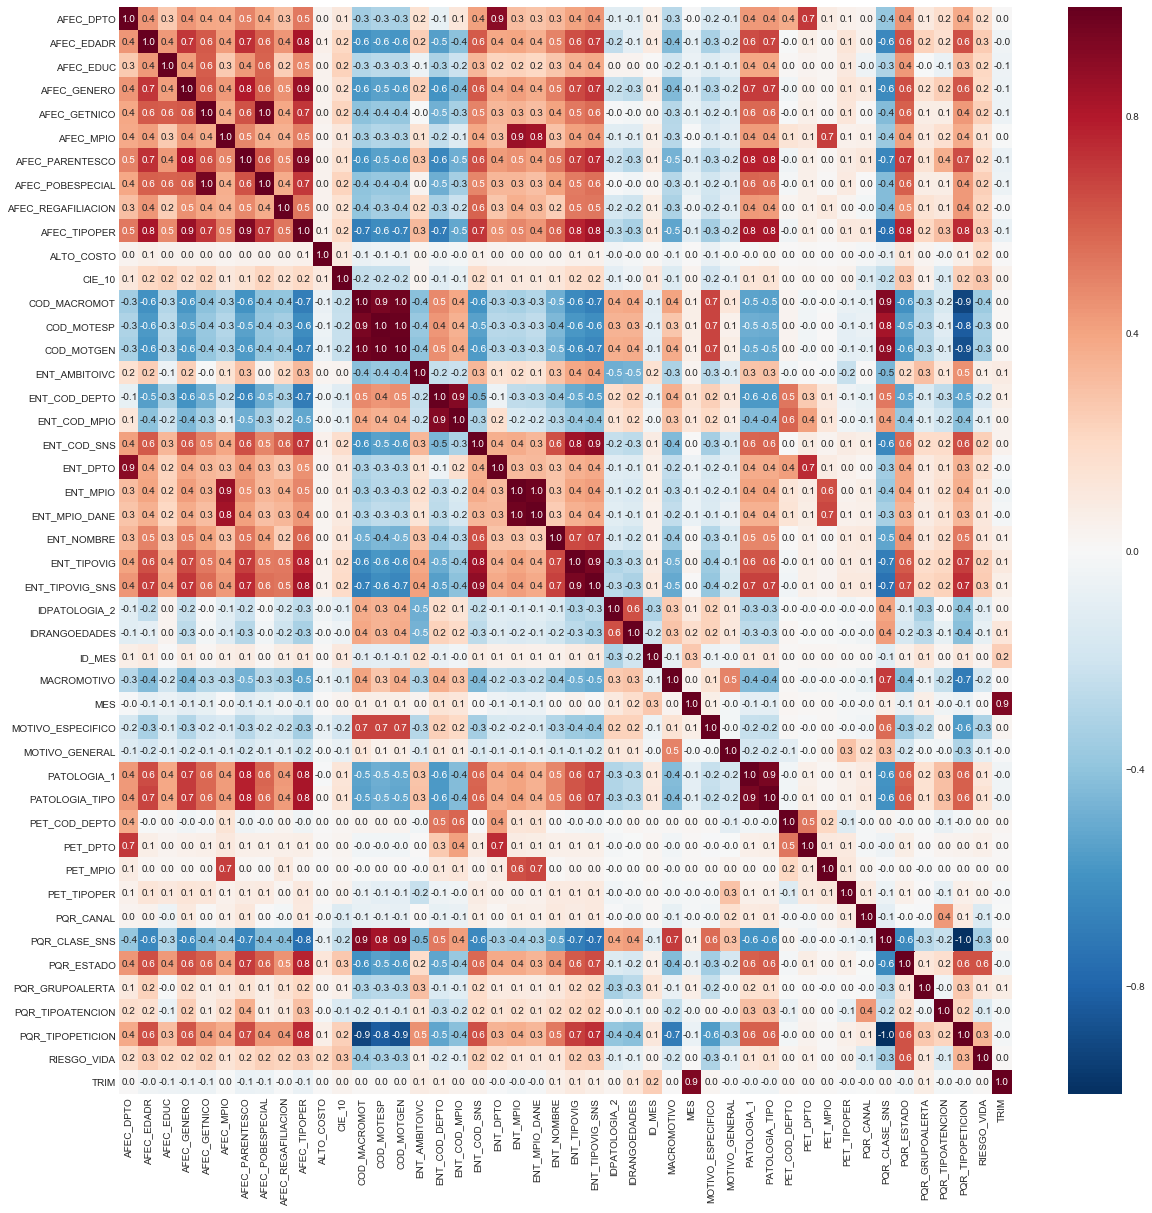

In [6]:
import seaborn as sns
plt.figure(figsize=(20, 20))

ax = sns.heatmap(dataset_lbl_encoded.corr(), cmap = "RdBu_r", annot=True, fmt='.1f')

In [7]:
dataset_lbl_encoded = dataset_lbl_encoded.drop(
        [
            'AFEC_GETNICO', 
            'AFEC_POBESPECIAL', 
            'AFEC_TIPOPER',
            'ALTO_COSTO',
            'COD_MACROMOT',
            'MACROMOTIVO',
            'PATOLOGIA_1',
            'PATOLOGIA_TIPO',
            'PET_TIPOPER',
            'PQR_CLASE_SNS',
            'PQR_ESTADO',
            'PQR_GRUPOALERTA',
            'PQR_TIPOATENCION',
            'PQR_TIPOPETICION'
            
        ], axis = 1)

dataset_lbl_encoded.to_csv('datasets/dataset_lbl_encoded.csv', index = False)

In [8]:
s = pd.Series(list('abca'))
print(s)
pd.get_dummies(s)

0    a
1    b
2    c
3    a
dtype: object


,a,b,c
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0


In [9]:
dataset_mot_esp_encoded = dataset.astype(str)

dataset_mot_esp_encoded = pd.get_dummies(dataset_mot_esp_encoded[['MOTIVO_ESPECIFICO']])
dataset_mot_esp_encoded['RIESGO_VIDA'] = dataset['RIESGO_VIDA'].apply(lambda value: 1 if value == 'si' else 0)
dataset_mot_esp_encoded.head()

,MOTIVO_ESPECIFICO_None,MOTIVO_ESPECIFICO_agente virtual,MOTIVO_ESPECIFICO_agradecimiento y/o felicitación,MOTIVO_ESPECIFICO_ambulancia innadecuada para el traslado del paciente segun el nivel de complejidad (referencia-contrarreferencia),MOTIVO_ESPECIFICO_barreras de acceso en la afiliacion (tramites no contemplados por la ley),MOTIVO_ESPECIFICO_beneficiarios que no corresponden.,MOTIVO_ESPECIFICO_cancer,MOTIVO_ESPECIFICO_certicámara y/o firma digital,MOTIVO_ESPECIFICO_certificacion de existencias,MOTIVO_ESPECIFICO_circular unica,...,MOTIVO_ESPECIFICO_tramite de la referencia a cargo del usuario,"MOTIVO_ESPECIFICO_tramites administrativos para la afiliacion que son responsabilidad de la eps, trasladados al usuario.",MOTIVO_ESPECIFICO_tramites para inscripcion ante la supersalud,MOTIVO_ESPECIFICO_transferencia a la supersalud,MOTIVO_ESPECIFICO_transferencia entre asesores de contact center,MOTIVO_ESPECIFICO_traslado de municipio,MOTIVO_ESPECIFICO_trato indigno o deshumanizado,MOTIVO_ESPECIFICO_usuario desinformado frente al servicio de atencion en salud que le estan prestando.,MOTIVO_ESPECIFICO_vih sida y otras et sexual,RIESGO_VIDA
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [10]:
df_corr = dataset_mot_esp_encoded.corr()['RIESGO_VIDA'].to_frame(name = 'corr')
df_corr.head()

,corr
MOTIVO_ESPECIFICO_None,-0.000292
MOTIVO_ESPECIFICO_agente virtual,-0.015124
MOTIVO_ESPECIFICO_agradecimiento y/o felicitación,-0.010348
MOTIVO_ESPECIFICO_ambulancia innadecuada para el traslado del paciente segun el nivel de complejidad (referencia-contrarreferencia),0.006900
MOTIVO_ESPECIFICO_barreras de acceso en la afiliacion (tramites no contemplados por la ley),-0.010327


In [11]:
df_corr.sort_values(by = 'corr', ascending = False).head(10)

,corr
RIESGO_VIDA,1.000000
MOTIVO_ESPECIFICO_demora de la referencia o contrarreferencia,0.352453
MOTIVO_ESPECIFICO_demora de la autorizacion de servicios de alto costo para: cancer,0.183711
MOTIVO_ESPECIFICO_cancer,0.158134
MOTIVO_ESPECIFICO_falta de oportunidad en la entrega de medicamentos no pos,0.115301
MOTIVO_ESPECIFICO_fallas en la oportunidad para la ubicacion del usuario (referencia-contrarreferencia),0.098985
MOTIVO_ESPECIFICO_demora de la autorizacion de medicamentos no-pos.,0.070067
MOTIVO_ESPECIFICO_negacion para la entrega de medicamentos no pos,0.067887
MOTIVO_ESPECIFICO_falta de oportunidad en la entrega de medicamentos pos,0.058969
MOTIVO_ESPECIFICO_materno infantil,0.054870


In [12]:
set(dataset['AFEC_EDADR'].values)

{None,
 'de 0 a 5 años',
 'de 13 a 17 años',
 'de 18 a 24 años',
 'de 25 a 29 años',
 'de 30 a 37 años',
 'de 38 a 49 años',
 'de 50 a 62 años',
 'de 6 a 12 años',
 'mayor de 63 años'}

In [13]:
set(dataset['AFEC_EDUC'].values)

{None,
 'ninguno',
 'posgrado',
 'primaria',
 'primaria incompleta',
 'secundaria',
 'secundaria incompleta',
 'universitario',
 'universitario incompleto'}

In [14]:
def get_edad_order(value):
    value_range = {
        'de 0 a 5 años': 0,
        'de 13 a 17 años': 1,
        'de 18 a 24 años': 2,
        'de 25 a 29 años': 3,
        'de 30 a 37 años': 4,
        'de 38 a 49 años': 5,
        'de 50 a 62 años': 6,
        'de 6 a 12 años': 7,
        'mayor de 63 años': 8
            }
    return value_range.get(value, None)

def get_edu_order(value):
    value_range = {
        'ninguno': 0,
        'primaria incompleta': 1,
        'primaria': 2,
        'secundaria incompleta': 3, 
        'secundaria': 4,
        'universitario incompleto': 5,
        'universitario': 6,
        'posgrado': 7
    }
    return value_range.get(value, None)

In [15]:
dataset_mix_encoded = dataset.copy()
dataset_mix_encoded['AFEC_EDADR'] = dataset_mix_encoded['AFEC_EDADR'].apply(get_edad_order)
dataset_mix_encoded['AFEC_EDUC'] = dataset_mix_encoded['AFEC_EDUC'].apply(get_edu_order)
dataset_mix_encoded[['AFEC_EDADR', 'AFEC_EDUC']].head()

,AFEC_EDADR,AFEC_EDUC
0,1.0,0.0
1,0.0,0.0
2,1.0,4.0
3,1.0,5.0
4,1.0,0.0


In [16]:
columns_mix_encoded = list(dataset_mix_encoded.columns)
columns_mix_encoded.remove('AFEC_EDADR')
columns_mix_encoded.remove('AFEC_EDUC')
columns_mix_encoded

dataset_mix_encoded[columns_mix_encoded] = dataset_mix_encoded[columns_mix_encoded].astype(str)
le = preprocessing.LabelEncoder()
for column in columns_mix_encoded:
    le.fit(dataset_mix_encoded[column])
    dataset_mix_encoded[column] = le.transform(dataset_mix_encoded[column]) 

dataset_mix_encoded.head()

,AFEC_DPTO,AFEC_EDADR,AFEC_EDUC,AFEC_GENERO,AFEC_GETNICO,AFEC_MPIO,AFEC_PARENTESCO,AFEC_POBESPECIAL,AFEC_REGAFILIACION,AFEC_TIPOPER,...,PET_MPIO,PET_TIPOPER,PQR_CANAL,PQR_CLASE_SNS,PQR_ESTADO,PQR_GRUPOALERTA,PQR_TIPOATENCION,PQR_TIPOPETICION,RIESGO_VIDA,TRIM
0,7,1.0,0.0,2,5,125,12,4,5,2,...,124,1,3,1,2,0,3,4,1,1
1,24,0.0,0.0,1,5,817,12,4,5,2,...,813,2,5,1,2,0,0,4,1,1
2,34,1.0,4.0,1,5,166,1,4,1,2,...,165,2,5,1,2,0,0,4,1,1
3,20,1.0,5.0,1,5,707,13,4,1,2,...,702,2,4,1,2,0,0,4,1,1
4,28,1.0,0.0,1,5,333,13,5,1,2,...,331,2,4,1,4,0,0,4,2,1


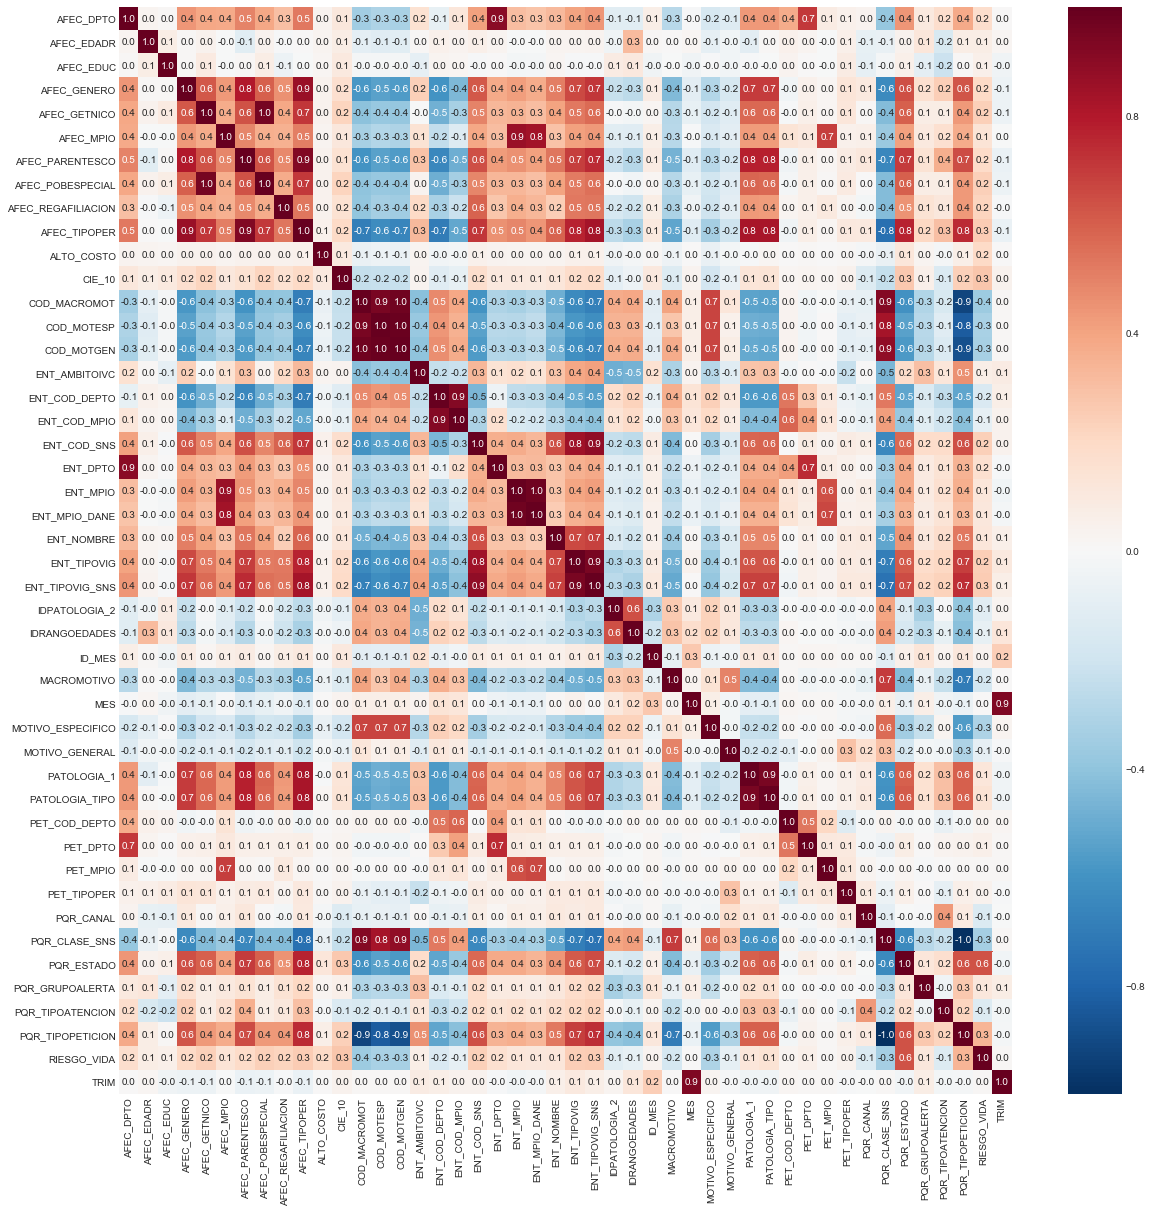

In [17]:
plt.figure(figsize=(20, 20))

ax = sns.heatmap(dataset_mix_encoded.corr(), cmap = "RdBu_r", annot=True, fmt='.1f')

In [41]:
dataset_cie10 = pd.read_csv(f'datasets/experiments/cie10.csv')
dataset_cie10 = dataset_cie10.sample(frac = 0.1)
dataset_cie10.head()

,AFEC_DPTO,AFEC_EDUC,AFEC_GENERO,AFEC_GETNICO,AFEC_MPIO,AFEC_PARENTESCO,AFEC_POBESPECIAL,AFEC_REGAFILIACION,AFEC_TIPOPER,ALTO_COSTO,...,PQR_TIPOPETICION,TRIM,CAPITULO,COD_CIE_10_03,COD_CIE_10_04,CIE10_SEXO,AFEC_EDADR_INF,AFEC_EDADR_SUP,CIE10_RANGO_EDAD,RIESGO_VIDA
88812,0.425153,0.469517,0.412468,0.42859,0.402496,0.383166,0.419145,0.478781,0.431765,0.426038,...,0.455397,0.459890,0.248912,0.235294,0.230896,0.407151,0.413676,0.413676,0.413772,0
70313,0.356427,0.441622,0.458335,0.42859,0.359402,0.383166,0.419145,0.419117,0.431765,0.426038,...,0.002999,0.405202,0.311155,0.013400,0.000460,0.407151,0.359261,0.359261,0.413772,0
88692,0.552813,0.400555,0.412468,0.42859,0.459459,0.530243,0.419145,0.478781,0.431765,0.426038,...,0.455397,0.459890,0.453680,0.269953,0.405405,0.407151,0.526497,0.526497,0.413772,1
165561,0.526384,0.400555,0.458335,0.42859,0.404762,0.530243,0.419145,0.478781,0.431765,0.426038,...,0.455397,0.434331,0.311155,0.134942,0.130781,0.407151,0.359261,0.359261,0.413772,0
51938,0.320896,0.436647,0.458335,0.42859,0.359653,0.474571,0.419145,0.419117,0.431765,0.426038,...,0.455397,0.434331,0.321095,0.501010,0.616236,0.407151,0.413676,0.413676,0.413772,1


In [39]:
def scale_range(X):
    return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

def scale_max_clipping(X, clip):
    return X.apply(lambda x: x if x < clip else clip)

def scale_min_clipping(X, clip):
    return X.apply(lambda x: x if x > clip else clip)

def scale_log(X):
    return X.apply(lambda x: np.log(x + 1))

def scale_z_score(X):
    return X.apply(lambda x: (x - X.mean() / X.std()))

def normalizers(X, clip = 10):
    fig, ax = plt.subplots(1, 5, figsize=(17, 2))
    X_range = scale_range(X)
    X_clipped = scale_max_clipping(X, clip)
    X_log_scaled = scale_log(X)
    X_z_score = scale_z_score(X)

    ax[0].hist(X)
    ax[1].hist(X_range)
    ax[1].set_title('Scale Range')
    ax[2].hist(X_clipped)
    ax[2].set_title('Clipped')
    ax[3].hist(X_log_scaled)
    ax[3].set_title('Log')
    ax[4].hist(X_z_score)
    ax[4].set_title('Z-Score')

In [43]:
dataset_cie10.columns

Index(['AFEC_DPTO', 'AFEC_EDUC', 'AFEC_GENERO', 'AFEC_GETNICO', 'AFEC_MPIO',
       'AFEC_PARENTESCO', 'AFEC_POBESPECIAL', 'AFEC_REGAFILIACION',
       'AFEC_TIPOPER', 'ALTO_COSTO', 'COD_MACROMOT', 'COD_MOTESP',
       'COD_MOTGEN', 'ENT_AMBITOIVC', 'ENT_COD_DEPTO', 'ENT_COD_MPIO',
       'ENT_COD_SNS', 'ENT_MPIO_DANE', 'ENT_NOMBRE', 'ENT_TIPOVIG',
       'ENT_TIPOVIG_SNS', 'IDPATOLOGIA_2', 'MES', 'PATOLOGIA_1',
       'PATOLOGIA_TIPO', 'PET_COD_DEPTO', 'PET_MPIO', 'PET_TIPOPER',
       'PQR_CANAL', 'PQR_CLASE_SNS', 'PQR_TIPOATENCION', 'PQR_TIPOPETICION',
       'TRIM', 'CAPITULO', 'COD_CIE_10_03', 'COD_CIE_10_04', 'CIE10_SEXO',
       'AFEC_EDADR_INF', 'AFEC_EDADR_SUP', 'CIE10_RANGO_EDAD', 'RIESGO_VIDA'],
      dtype='object')

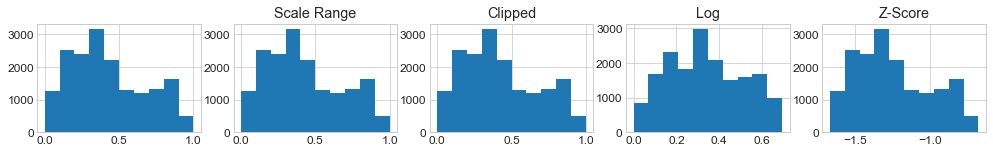

In [50]:
normalizers(dataset_cie10['COD_CIE_10_04'])